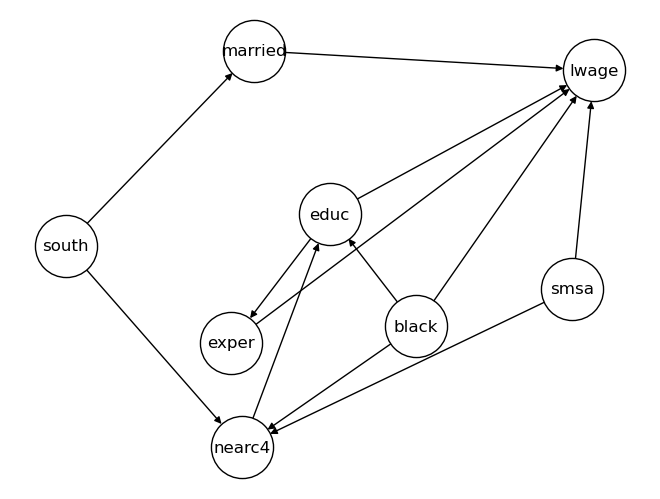

In [1]:
import networkx as nx
import dowhy
import pandas as pd
from dowhy import CausalModel
G = nx.DiGraph()

G.add_nodes_from(["lwage", "educ", "exper", "black", "south", "married", "smsa", "nearc4"])

G.add_edges_from([
    ("educ", "lwage"), ("exper", "lwage"),
    ("black", "lwage"), ("south", "married"), ("married", "lwage"),
    ("nearc4", "educ"),
    ("black", "educ"), ("south", "nearc4"),
    ("married", "lwage"),
    ("black", "nearc4"), ("smsa", "nearc4"), ("smsa", "lwage"), ("educ", "exper")
])

# we can visualise this graph (choosing node positions, colours, and sizes to make it more clear)
# and save it to a .gml format (for using DoWhy later)
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos= pos, with_labels=True, node_size=2000, node_color='w', edgecolors ='black')

In [2]:
close_college = pd.read_stata('close_college.dta')

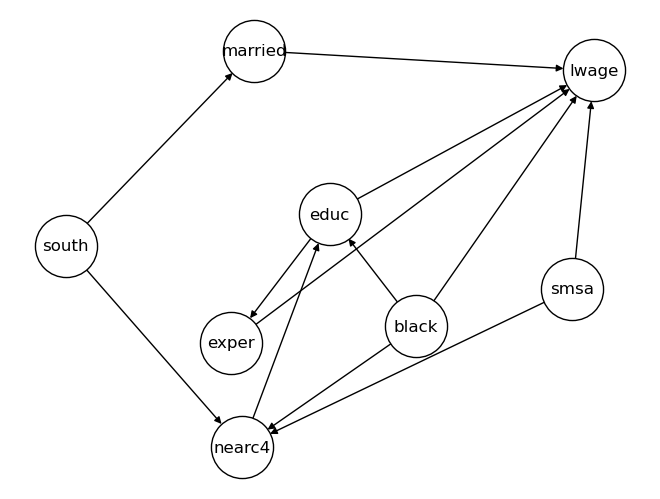

In [3]:
import networkx as nx
G = nx.DiGraph()

G.add_nodes_from(["lwage", "educ", "exper", "black", "south", "married", "smsa", "nearc4"])

G.add_edges_from([
    ("educ", "lwage"), ("exper", "lwage"),
    ("black", "lwage"), ("south", "married"), ("married", "lwage"),
    ("nearc4", "educ"),
    ("black", "educ"), ("south", "nearc4"),
    ("married", "lwage"),
    ("black", "nearc4"), ("smsa", "nearc4"), ("smsa", "lwage"), ("educ", "exper")
])

# we can visualise this graph (choosing node positions, colours, and sizes to make it more clear)
# and save it to a .gml format (for using DoWhy later)
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos= pos, with_labels=True, node_size=2000, node_color='w', edgecolors ='black')
nx.write_gml(G, "backdoor_criterion_graph.gml")

In [4]:
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

from IPython.display import Image, display

gml_graph = gml_to_string('backdoor_criterion_graph.gml')

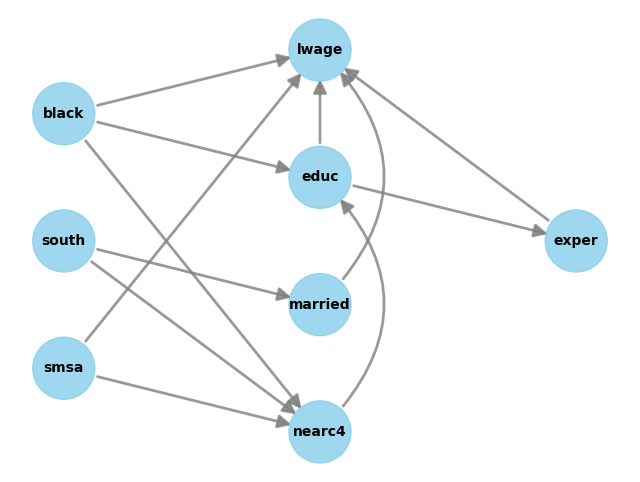

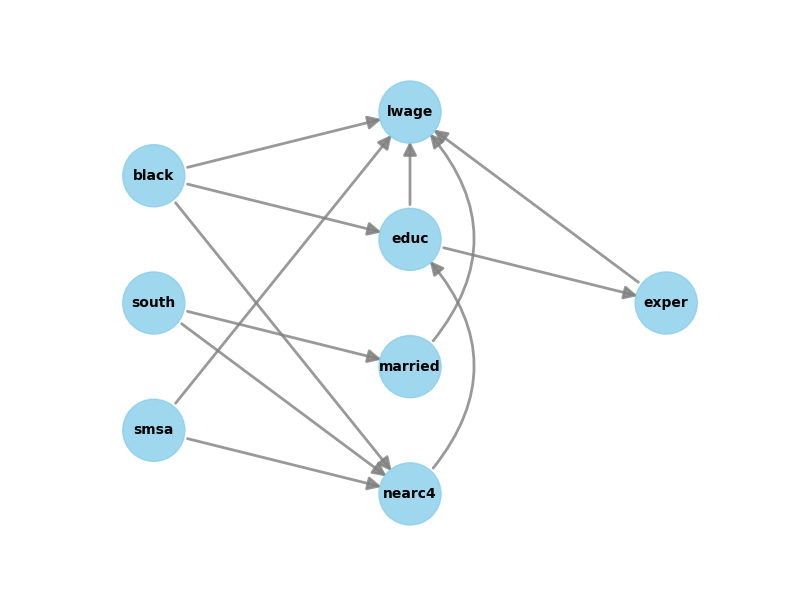

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                               
─────────(E[lwage|black,south,smsa])
d[nearc₄]                           
Estimand assumption 1, Unconfoundedness: If U→{nearc4} and U→lwage then P(lwage|nearc4,black,south,smsa,U) = P(lwage|nearc4,black,south,smsa)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [5]:
model=CausalModel(
        data = close_college,
        treatment="nearc4",
        outcome="lwage",
        graph=gml_graph
        )

model.view_model()
display(Image(filename="causal_model.png"))

identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

In [6]:
ihdp_identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(ihdp_identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                               
─────────(E[lwage|black,south,smsa])
d[nearc₄]                           
Estimand assumption 1, Unconfoundedness: If U→{nearc4} and U→lwage then P(lwage|nearc4,black,south,smsa,U) = P(lwage|nearc4,black,south,smsa)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [7]:
ihdp_estimate = model.estimate_effect(
                    ihdp_identified_estimand,
                    method_name="backdoor.propensity_score_stratification"
                )

print("The Causal Estimate is " + str(ihdp_estimate.value))

The Causal Estimate is 0.04001996895644325


In [8]:
ihdp_refute_placebo_treatment = model.refute_estimate(
                                    ihdp_identified_estimand,
                                    ihdp_estimate,
                                    method_name="placebo_treatment_refuter",
                                    placebo_type="permute"
                                )

print(ihdp_refute_placebo_treatment)

Refute: Use a Placebo Treatment
Estimated effect:0.04001996895644325
New effect:0.0027460292958167674
p value:0.8999999999999999



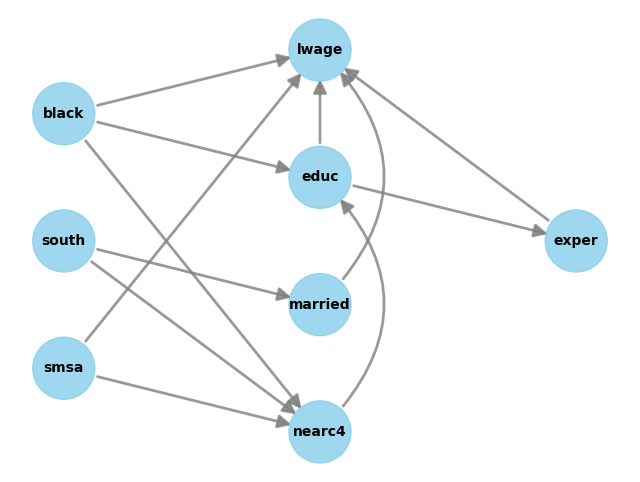

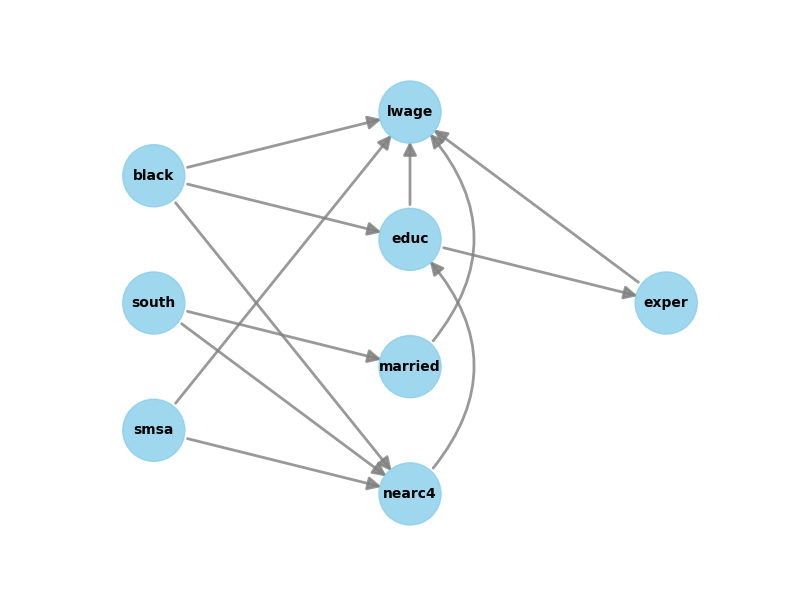

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                               
─────────(E[lwage|black,south,smsa])
d[nearc₄]                           
Estimand assumption 1, Unconfoundedness: If U→{nearc4} and U→lwage then P(lwage|nearc4,black,south,smsa,U) = P(lwage|nearc4,black,south,smsa)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

The Causal Estimate is 0.040479767771417485


In [11]:
close_college= close_college.fillna(0)
model=CausalModel(
        data = close_college,
        treatment="nearc4",
        outcome="lwage",
        graph=gml_graph
        )

model.view_model()
display(Image(filename="causal_model.png"))

identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

ihdp_estimate_lr = model.estimate_effect(
                    ihdp_identified_estimand,
                    method_name="backdoor.linear_regression"
                )

print("The Causal Estimate is " + str(ihdp_estimate_lr.value))

In [12]:
ihdp_refute_placebo_treatment = model.refute_estimate(
                                    ihdp_identified_estimand,
                                    ihdp_estimate_lr,
                                    method_name="placebo_treatment_refuter",
                                    placebo_type="permute"
                                )

print(ihdp_refute_placebo_treatment)

Refute: Use a Placebo Treatment
Estimated effect:0.040479767771417485
New effect:-0.0005857309634360686
p value:0.98

